# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names =['James','Jude', 'Chris','Beyonce', 'Tasha']

In [3]:
variables = ['Age', 'Salary','Allowance','Hrs_work', 'Networth']

In [4]:
random_num = np.random.randn(5,5)

In [5]:
data = pd.DataFrame(random_num,index=names,columns=variables)

In [15]:
data

,Age,Salary,Allowance,Hrs_work,Networth
James,0.390528,0.166905,0.184502,0.807706,0.072960
Jude,0.638787,0.329646,-0.497104,-0.754070,-0.943406
Chris,0.484752,-0.116773,1.901755,0.238127,1.996652
Beyonce,-0.993263,0.196800,-1.136645,0.000366,1.025984
Tasha,-0.156598,-0.031579,0.649826,2.154846,-0.610259


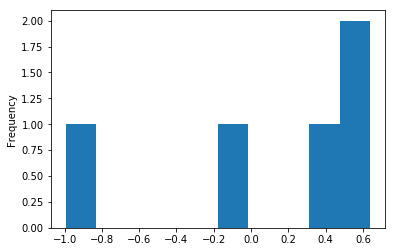

In [68]:
data['Age'].plot.hist()

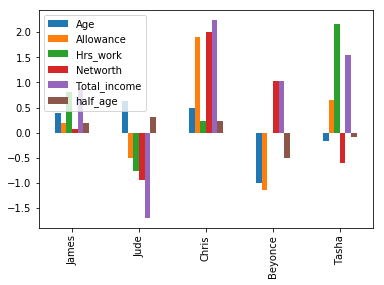

In [71]:
data.plot.bar()

## 1 - Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [19]:
data['Age']

James      0.390528
Jude       0.638787
Chris      0.484752
Beyonce   -0.993263
Tasha     -0.156598
Name: Age, dtype: float64

In [41]:
data['Salary']

James     -0.031579
Jude      -0.346419
Chris     -0.925874
Beyonce    2.084019
Tasha     -0.031160
Name: Salary, dtype: float64

In [42]:
# Pass a list of column names
data[['Age','Salary']]

,Age,Salary
James,-0.156598,-0.031579
Jude,-0.755325,-0.346419
Chris,1.024810,-0.925874
Beyonce,0.386030,2.084019
Tasha,1.035125,-0.031160


In [43]:
# SQL Syntax (NOT RECOMMENDED!)
data.Age

James     -0.156598
Jude      -0.755325
Chris      1.024810
Beyonce    0.386030
Tasha      1.035125
Name: Age, dtype: float64

DataFrame Columns are just Series

In [44]:
type(data['Age'])

pandas.core.series.Series

## 2 - Creating a new column:

In [20]:
data["Total_income"] = data['Hrs_work'] + data['Networth']

In [21]:
data

,Age,Salary,Allowance,Hrs_work,Networth,Total_income
James,0.390528,0.166905,0.184502,0.807706,0.072960,0.880666
Jude,0.638787,0.329646,-0.497104,-0.754070,-0.943406,-1.697476
Chris,0.484752,-0.116773,1.901755,0.238127,1.996652,2.234779
Beyonce,-0.993263,0.196800,-1.136645,0.000366,1.025984,1.026351
Tasha,-0.156598,-0.031579,0.649826,2.154846,-0.610259,1.544588


In [22]:
data['half_age'] = data['Age'] * 0.5

In [23]:
data

,Age,Salary,Allowance,Hrs_work,Networth,Total_income,half_age
James,0.390528,0.166905,0.184502,0.807706,0.072960,0.880666,0.195264
Jude,0.638787,0.329646,-0.497104,-0.754070,-0.943406,-1.697476,0.319394
Chris,0.484752,-0.116773,1.901755,0.238127,1.996652,2.234779,0.242376
Beyonce,-0.993263,0.196800,-1.136645,0.000366,1.025984,1.026351,-0.496632
Tasha,-0.156598,-0.031579,0.649826,2.154846,-0.610259,1.544588,-0.078299


In [49]:
data['Old_Age'] = data['Age'] * data['Hrs_work']

In [50]:
data

,Age,Salary,Allowance,Hrs_work,Networth,Total_income,half_age,Old_Age
James,-0.156598,-0.031579,0.649826,2.154846,-0.610259,1,-0.078299,-0.337444
Jude,-0.755325,-0.346419,0.147027,-0.479448,0.558769,2,-0.377663,0.362139
Chris,1.024810,-0.925874,1.862864,-1.133817,0.610478,3,0.512405,-1.161947
Beyonce,0.386030,2.084019,-0.376519,0.230336,0.681209,4,0.193015,0.088917
Tasha,1.035125,-0.031160,1.939932,-1.005187,-0.741790,5,0.517563,-1.040494


## 3 - Removing Columns

In [32]:
data.drop('Salary', axis=1, inplace=True)

In [34]:
drop_salary

,Age,Allowance,Hrs_work,Networth,Total_income,half_age
James,0.390528,0.184502,0.807706,0.072960,0.880666,0.195264
Jude,0.638787,-0.497104,-0.754070,-0.943406,-1.697476,0.319394
Chris,0.484752,1.901755,0.238127,1.996652,2.234779,0.242376
Beyonce,-0.993263,-1.136645,0.000366,1.025984,1.026351,-0.496632
Tasha,-0.156598,0.649826,2.154846,-0.610259,1.544588,-0.078299


In [33]:
data

,Age,Allowance,Hrs_work,Networth,Total_income,half_age
James,0.390528,0.184502,0.807706,0.072960,0.880666,0.195264
Jude,0.638787,-0.497104,-0.754070,-0.943406,-1.697476,0.319394
Chris,0.484752,1.901755,0.238127,1.996652,2.234779,0.242376
Beyonce,-0.993263,-1.136645,0.000366,1.025984,1.026351,-0.496632
Tasha,-0.156598,0.649826,2.154846,-0.610259,1.544588,-0.078299


In [52]:
data_old = data.drop(['Networth', 'Hrs_work', 'Old_Age'], axis=1)

In [53]:
data

,Age,Salary,Allowance,Hrs_work,Networth,half_age,Old_Age
James,-0.156598,-0.031579,0.649826,2.154846,-0.610259,-0.078299,-0.337444
Jude,-0.755325,-0.346419,0.147027,-0.479448,0.558769,-0.377663,0.362139
Chris,1.024810,-0.925874,1.862864,-1.133817,0.610478,0.512405,-1.161947
Beyonce,0.386030,2.084019,-0.376519,0.230336,0.681209,0.193015,0.088917
Tasha,1.035125,-0.031160,1.939932,-1.005187,-0.741790,0.517563,-1.040494


In [54]:
data_old

,Age,Salary,Allowance,half_age
James,-0.156598,-0.031579,0.649826,-0.078299
Jude,-0.755325,-0.346419,0.147027,-0.377663
Chris,1.024810,-0.925874,1.862864,0.512405
Beyonce,0.386030,2.084019,-0.376519,0.193015
Tasha,1.035125,-0.031160,1.939932,0.517563


In [55]:
data

,Age,Salary,Allowance,Hrs_work,Networth,half_age,Old_Age
James,-0.156598,-0.031579,0.649826,2.154846,-0.610259,-0.078299,-0.337444
Jude,-0.755325,-0.346419,0.147027,-0.479448,0.558769,-0.377663,0.362139
Chris,1.024810,-0.925874,1.862864,-1.133817,0.610478,0.512405,-1.161947
Beyonce,0.386030,2.084019,-0.376519,0.230336,0.681209,0.193015,0.088917
Tasha,1.035125,-0.031160,1.939932,-1.005187,-0.741790,0.517563,-1.040494


In [56]:
data

,Age,Salary,Allowance,Hrs_work,Networth,half_age,Old_Age
James,-0.156598,-0.031579,0.649826,2.154846,-0.610259,-0.078299,-0.337444
Jude,-0.755325,-0.346419,0.147027,-0.479448,0.558769,-0.377663,0.362139
Chris,1.024810,-0.925874,1.862864,-1.133817,0.610478,0.512405,-1.161947
Beyonce,0.386030,2.084019,-0.376519,0.230336,0.681209,0.193015,0.088917
Tasha,1.035125,-0.031160,1.939932,-1.005187,-0.741790,0.517563,-1.040494


In [57]:
data

,Age,Salary,Allowance,Hrs_work,Networth,half_age,Old_Age
James,-0.156598,-0.031579,0.649826,2.154846,-0.610259,-0.078299,-0.337444
Jude,-0.755325,-0.346419,0.147027,-0.479448,0.558769,-0.377663,0.362139
Chris,1.024810,-0.925874,1.862864,-1.133817,0.610478,0.512405,-1.161947
Beyonce,0.386030,2.084019,-0.376519,0.230336,0.681209,0.193015,0.088917
Tasha,1.035125,-0.031160,1.939932,-1.005187,-0.741790,0.517563,-1.040494


## 4 - Dropping Rows

In [35]:
data.drop('Tasha')

,Age,Allowance,Hrs_work,Networth,Total_income,half_age
James,0.390528,0.184502,0.807706,0.072960,0.880666,0.195264
Jude,0.638787,-0.497104,-0.754070,-0.943406,-1.697476,0.319394
Chris,0.484752,1.901755,0.238127,1.996652,2.234779,0.242376
Beyonce,-0.993263,-1.136645,0.000366,1.025984,1.026351,-0.496632


In [45]:
data

,Age,Allowance,Hrs_work,Networth,Total_income,half_age
James,0.390528,0.184502,0.807706,0.072960,0.880666,0.195264
Jude,0.638787,-0.497104,-0.754070,-0.943406,-1.697476,0.319394
Chris,0.484752,1.901755,0.238127,1.996652,2.234779,0.242376
Beyonce,-0.993263,-1.136645,0.000366,1.025984,1.026351,-0.496632
Tasha,-0.156598,0.649826,2.154846,-0.610259,1.544588,-0.078299


## 5- Selecting from rows

In [44]:
data.loc['Tasha']

Age            -0.156598
Allowance       0.649826
Hrs_work        2.154846
Networth       -0.610259
Total_income    1.544588
half_age       -0.078299
Name: Tasha, dtype: float64

In [46]:
data.iloc[4]

Age            -0.156598
Allowance       0.649826
Hrs_work        2.154846
Networth       -0.610259
Total_income    1.544588
half_age       -0.078299
Name: Tasha, dtype: float64

Or select based off of position instead of label 

In [61]:
data.iloc[3]

Age          0.386030
Salary       2.084019
Allowance   -0.376519
Hrs_work     0.230336
Networth     0.681209
half_age     0.193015
Old_Age      0.088917
Name: Beyonce, dtype: float64

## 6 - Selecting subset of rows and columns

In [57]:
data.loc[['Beyonce', 'Tasha'], ['Hrs_work', 'Age']]

,Hrs_work,Age
Beyonce,0.000366,-0.993263
Tasha,2.154846,-0.156598


### 7 - Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [6]:
data

,Age,Salary,Allowance,Hrs_work,Networth
James,-0.986496,-2.126544,1.117160,1.626907,-0.601650
Jude,-0.873160,0.763442,1.735426,-0.702485,-1.287883
Chris,0.165742,-0.349948,1.725118,0.991169,1.330394
Beyonce,-1.390882,1.579611,1.143386,-1.958204,0.934956
Tasha,0.489398,1.107542,-0.201599,-0.115668,0.630851


In [7]:
data[data['Age'] > 0]

,Age,Salary,Allowance,Hrs_work,Networth
Chris,0.165742,-0.349948,1.725118,0.991169,1.330394
Tasha,0.489398,1.107542,-0.201599,-0.115668,0.630851


In [8]:
data[data > 0]

,Age,Salary,Allowance,Hrs_work,Networth
James,NaN,NaN,1.117160,1.626907,NaN
Jude,NaN,0.763442,1.735426,NaN,NaN
Chris,0.165742,NaN,1.725118,0.991169,1.330394
Beyonce,NaN,1.579611,1.143386,NaN,0.934956
Tasha,0.489398,1.107542,NaN,NaN,0.630851


In [11]:
data[data>0]['Hrs_work'] 

James      1.626907
Jude            NaN
Chris      0.991169
Beyonce         NaN
Tasha           NaN
Name: Hrs_work, dtype: float64

In [10]:
data[data['Age']>0]['Hrs_work']

Chris    0.991169
Tasha   -0.115668
Name: Hrs_work, dtype: float64

In [12]:
data[data['Age']>0][['Salary','Allowance']]

,Salary,Allowance
Chris,-0.349948,1.725118
Tasha,1.107542,-0.201599


For two conditions you can use | and & with parenthesis:

In [65]:
data[(data['Age']>0) & (data['Hrs_work'] > 1)]

,Age,Allowance,Hrs_work,Networth,Total_income,half_age


In [67]:
data[(data['Age']>0) | (data['Hrs_work'] > 1)]

,Age,Allowance,Hrs_work,Networth,Total_income,half_age
James,0.390528,0.184502,0.807706,0.072960,0.880666,0.195264
Jude,0.638787,-0.497104,-0.754070,-0.943406,-1.697476,0.319394
Chris,0.484752,1.901755,0.238127,1.996652,2.234779,0.242376
Tasha,-0.156598,0.649826,2.154846,-0.610259,1.544588,-0.078299


## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [13]:
data

,Age,Salary,Allowance,Hrs_work,Networth
James,-0.986496,-2.126544,1.117160,1.626907,-0.601650
Jude,-0.873160,0.763442,1.735426,-0.702485,-1.287883
Chris,0.165742,-0.349948,1.725118,0.991169,1.330394
Beyonce,-1.390882,1.579611,1.143386,-1.958204,0.934956
Tasha,0.489398,1.107542,-0.201599,-0.115668,0.630851


In [14]:
# Reset to default 0,1...n index
data.reset_index()

,index,Age,Salary,Allowance,Hrs_work,Networth
0,James,-0.986496,-2.126544,1.117160,1.626907,-0.601650
1,Jude,-0.873160,0.763442,1.735426,-0.702485,-1.287883
2,Chris,0.165742,-0.349948,1.725118,0.991169,1.330394
3,Beyonce,-1.390882,1.579611,1.143386,-1.958204,0.934956
4,Tasha,0.489398,1.107542,-0.201599,-0.115668,0.630851


In [16]:
newind = 'CA NY WY OR CO'.split()

In [17]:
data['States'] = newind

In [22]:
data

,Age,Salary,Allowance,Hrs_work,Networth,States
James,0.302665,1.693723,-1.706086,-1.159119,-0.134841,CA
Jude,0.390528,0.166905,0.184502,0.807706,0.072960,NY
Chris,0.638787,0.329646,-0.497104,-0.754070,-0.943406,WY
Beyonce,0.484752,-0.116773,1.901755,0.238127,1.996652,OR
Tasha,-0.993263,0.196800,-1.136645,0.000366,1.025984,CO


In [18]:
data.set_index('States')

,Age,Salary,Allowance,Hrs_work,Networth
States,,,,,
CA,-0.986496,-2.126544,1.117160,1.626907,-0.601650
NY,-0.873160,0.763442,1.735426,-0.702485,-1.287883
WY,0.165742,-0.349948,1.725118,0.991169,1.330394
OR,-1.390882,1.579611,1.143386,-1.958204,0.934956
CO,0.489398,1.107542,-0.201599,-0.115668,0.630851


In [24]:
data

,Age,Salary,Allowance,Hrs_work,Networth,States
James,0.302665,1.693723,-1.706086,-1.159119,-0.134841,CA
Jude,0.390528,0.166905,0.184502,0.807706,0.072960,NY
Chris,0.638787,0.329646,-0.497104,-0.754070,-0.943406,WY
Beyonce,0.484752,-0.116773,1.901755,0.238127,1.996652,OR
Tasha,-0.993263,0.196800,-1.136645,0.000366,1.025984,CO


In [19]:
data.set_index('States',inplace=True)

In [20]:
data

,Age,Salary,Allowance,Hrs_work,Networth
States,,,,,
CA,-0.986496,-2.126544,1.117160,1.626907,-0.601650
NY,-0.873160,0.763442,1.735426,-0.702485,-1.287883
WY,0.165742,-0.349948,1.725118,0.991169,1.330394
OR,-1.390882,1.579611,1.143386,-1.958204,0.934956
CO,0.489398,1.107542,-0.201599,-0.115668,0.630851


## Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [21]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [254]:
hier_index

MultiIndex(levels=[['G1', 'G2'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [257]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

A         B
G1 1  0.153661  0.167638
   2 -0.765930  0.962299
   3  0.902826 -0.537909
G2 1 -1.549671  0.435253
   2  1.259904 -0.447898
   3  0.266207  0.412580

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [260]:
df.loc['G1']

,A,B
1,0.153661,0.167638
2,-0.765930,0.962299
3,0.902826,-0.537909


In [263]:
df.loc['G1'].loc[1]

A    0.153661
B    0.167638
Name: 1, dtype: float64

In [265]:
df.index.names

FrozenList([None, None])

In [266]:
df.index.names = ['Group','Num']

In [267]:
df

A         B
Group Num                    
G1    1    0.153661  0.167638
      2   -0.765930  0.962299
      3    0.902826 -0.537909
G2    1   -1.549671  0.435253
      2    1.259904 -0.447898
      3    0.266207  0.412580

In [270]:
df.xs('G1')

,A,B
Num,,
1,0.153661,0.167638
2,-0.765930,0.962299
3,0.902826,-0.537909


In [271]:
df.xs(['G1',1])

A    0.153661
B    0.167638
Name: (G1, 1), dtype: float64

In [273]:
df.xs(1,level='Num')

,A,B
Group,,
G1,0.153661,0.167638
G2,-1.549671,0.435253


# Great Job!